In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [14]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [15]:
#Perform API Calls
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).

# Set up the URL.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# setting up lists to hold reponse info
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_temp = []
Wind_Speed = []


# Looping through the list of cities and requesting for data on each
print("Beginning Data Retrieval ")
print("----------------------------")
for city in cities:
    response = requests.get(query_url + city).json()
    time.sleep(1)
    try:
        City.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])
        print(f"Processing City number {len(City)} | {city}")
    except KeyError:
        print("City not found. Skipping...")
        pass


print("----------------------------")
print("Data Retrieval Complete")
print("----------------------------")




Beginning Data Retrieval 
----------------------------
Processing City number 1 | jilin
City not found. Skipping...
Processing City number 2 | ushuaia
Processing City number 3 | hermanus
Processing City number 4 | amapa
Processing City number 5 | ancud
Processing City number 6 | kavieng
Processing City number 7 | yellowknife
Processing City number 8 | saldanha
Processing City number 9 | kapaa
City not found. Skipping...
City not found. Skipping...
Processing City number 10 | castro
Processing City number 11 | puri
Processing City number 12 | rikitea
Processing City number 13 | cao bang
Processing City number 14 | tuma
Processing City number 15 | mar del plata
Processing City number 16 | buala
Processing City number 17 | lagoa
Processing City number 18 | barrow
Processing City number 19 | novaya lyada
Processing City number 20 | shimoda
Processing City number 21 | luderitz
Processing City number 22 | bengkulu
Processing City number 23 | paita
Processing City number 24 | iqaluit
Processi

City not found. Skipping...
Processing City number 204 | cherskiy
Processing City number 205 | churapcha
Processing City number 206 | naze
City not found. Skipping...
Processing City number 207 | airai
City not found. Skipping...
Processing City number 208 | chengde
Processing City number 209 | ambilobe
Processing City number 210 | reims
Processing City number 211 | nampula
Processing City number 212 | hami
Processing City number 213 | portland
Processing City number 214 | halifax
Processing City number 215 | shenzhen
Processing City number 216 | atambua
Processing City number 217 | batagay
Processing City number 218 | srednekolymsk
City not found. Skipping...
Processing City number 219 | mahebourg
Processing City number 220 | dzaoudzi
Processing City number 221 | arrifes
Processing City number 222 | ordu
Processing City number 223 | evensk
Processing City number 224 | kluang
City not found. Skipping...
Processing City number 225 | druzhba
Processing City number 226 | tuatapere
Process

Processing City number 408 | sola
Processing City number 409 | renqiu
Processing City number 410 | methoni
Processing City number 411 | tuscaloosa
Processing City number 412 | toulouse
Processing City number 413 | wewak
Processing City number 414 | cockburn town
Processing City number 415 | tigil
Processing City number 416 | porbandar
Processing City number 417 | soe
Processing City number 418 | ozernovskiy
City not found. Skipping...
Processing City number 419 | santa catalina
Processing City number 420 | tahta
Processing City number 421 | marsaxlokk
Processing City number 422 | te anau
Processing City number 423 | svarstad
Processing City number 424 | samfya
City not found. Skipping...
Processing City number 425 | inirida
City not found. Skipping...
Processing City number 426 | sattahip
Processing City number 427 | altamont
Processing City number 428 | hamilton
Processing City number 429 | dungarpur
Processing City number 430 | chuy
Processing City number 431 | port-cartier
Processin

In [16]:
#Exporting the city data into a .csv and Displaying the DataFrame.


weather_data = pd.DataFrame({"City":City,"Cloudiness":Cloudiness,"Country":Country,"Date":Date,
                             "Humidity":Humidity,"Latitude":Lat,"Longitude":Lng,"Max Temperature":Max_temp,"Wind Speed":Wind_Speed})

weather_data.to_csv("output_data_file", index=False, header=True)

weather_data

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Jilin,100,CN,1583770247,91,43.00,126.00,24.69,3.42
1,Ushuaia,40,AR,1583770249,57,-54.80,-68.30,51.80,11.41
2,Hermanus,100,ZA,1583770250,85,-34.42,19.23,73.99,5.01
3,Amapá,90,BR,1583770251,54,1.00,-52.00,85.89,5.28
4,Ancud,20,CL,1583770252,72,-41.87,-73.82,59.00,3.36
...,...,...,...,...,...,...,...,...,...
556,Belaya Gora,100,RU,1583770932,98,68.53,146.42,-21.03,6.58
557,Plettenberg Bay,100,ZA,1583770933,95,-34.05,23.37,64.65,14.36
558,Ugoofaaru,26,MV,1583770936,64,5.67,73.00,83.73,6.76
559,Øksfjord,100,NO,1583770937,85,70.24,22.35,39.20,17.22


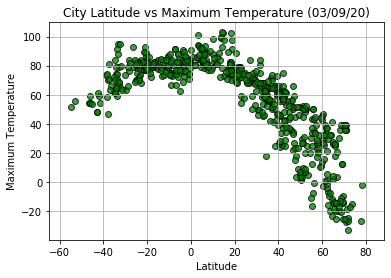

In [29]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.

#Latitude vs. Temperature Plot

x_axis = weather_data["Latitude"]
y_axis = weather_data["Max Temperature"]
timestamp = weather_data["Date"][1]
Date = time.strftime("%D", time.localtime(int(timestamp)))
plt.xlim((weather_data["Latitude"]).min()-10,(weather_data["Latitude"]).max()+10)
plt.grid()
plt.title(f"City Latitude vs Maximum Temperature ({Date})")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.scatter(x_axis,y_axis, marker="o", facecolors="green", edgecolors="black", alpha=0.75)

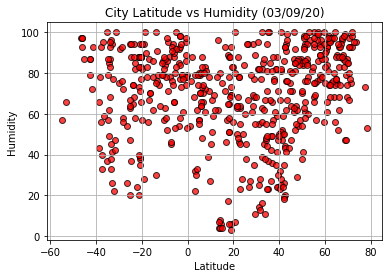

In [31]:
#Latitude vs. Humidity Plot

x_axis = weather_data["Latitude"]
y_axis = weather_data["Humidity"]
plt.grid()
plt.title(f"City Latitude vs Humidity ({Date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.scatter(x_axis,y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

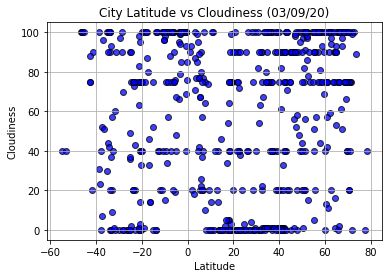

In [32]:
#Latitude vs. Cloudiness Plot

x_axis = weather_data["Latitude"]
y_axis = weather_data["Cloudiness"]
plt.grid()
plt.title(f"City Latitude vs Cloudiness ({Date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.scatter(x_axis,y_axis, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)

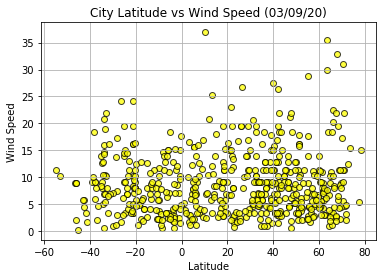

In [33]:
#Latitude vs. Wind Speed Plot

x_axis = weather_data["Latitude"]
y_axis = weather_data["Wind Speed"]
plt.grid()
plt.title(f"City Latitude vs Wind Speed ({Date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.scatter(x_axis,y_axis, marker="o", facecolors="yellow", edgecolors="black",alpha=0.75)

The r-squared is: -0.8662146857614161


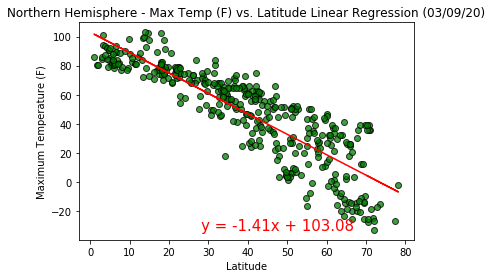

In [34]:
# Creating a function to create Linear Regression plots


def linear_regression(x_values,y_values,color):
    (slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
    print(f"The r-squared is: {rvalue}")
    regress_value = x_values*slope + intercept
    plt.scatter(x_values,y_values, marker="o", facecolors=color, edgecolors="black",alpha=0.75)
    plt.plot(x_values,regress_value,"r-")
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(x_values.max()-50,y_values.min()),fontsize=15,color='red')

# Creating Northern and Southern Hemisphere DataFrames    

#Northern Hemishere DataFrame
Data_north = weather_data.loc[weather_data["Latitude"]>0,:]

#Southern Hemishere DataFrame
Data_south = weather_data.loc[weather_data["Latitude"]<0,:]


#Northern Hemisphere - Max Temp vs. Latitude Linear Regression

plt.title(f"Northern Hemisphere - Max Temp (F) vs. Latitude Linear Regression ({Date})")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
linear_regression(Data_north["Latitude"],Data_north["Max Temperature"],"green")

The r-squared is: 0.5601383894177829


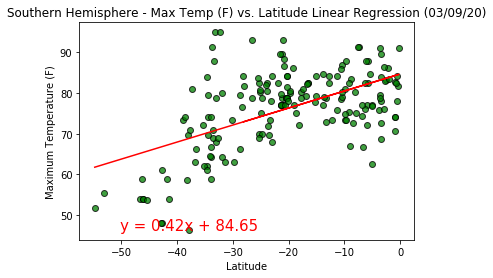

In [35]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression


plt.title(f"Southern Hemisphere - Max Temp (F) vs. Latitude Linear Regression ({Date})")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
linear_regression(Data_south["Latitude"],Data_south["Max Temperature"],"green")

The r-squared is: 0.3781852650881975


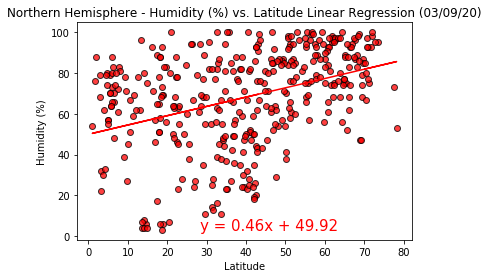

In [36]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression


plt.title(f"Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({Date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
linear_regression(Data_north["Latitude"],Data_north["Humidity"],"red")

The r-squared is: 0.15337739534164668


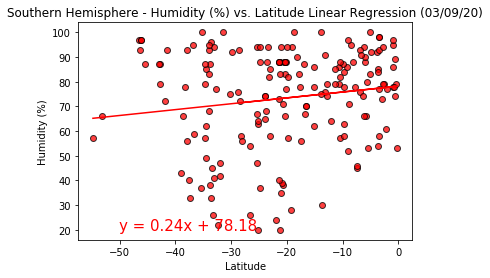

In [37]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression


plt.title(f"Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression ({Date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
linear_regression(Data_south["Latitude"],Data_south["Humidity"],"red")

The r-squared is: 0.3075812640654545


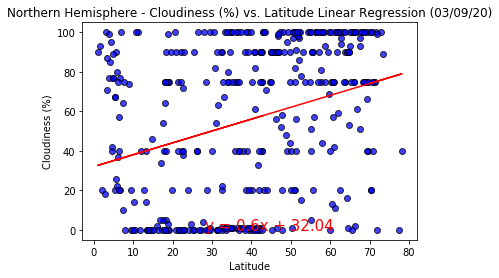

In [38]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

plt.title(f"Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({Date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
linear_regression(Data_north["Latitude"],Data_north["Cloudiness"],"blue")

The r-squared is: 0.23455780097942136


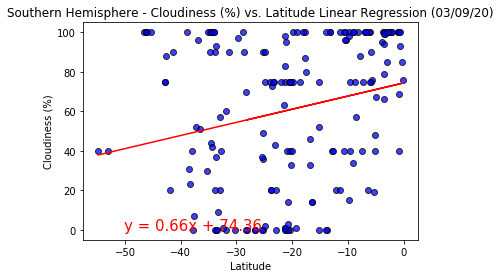

In [39]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression ({Date})")
linear_regression(Data_south["Latitude"],Data_south["Cloudiness"],"blue")

The r-squared is: 0.016236415698813407


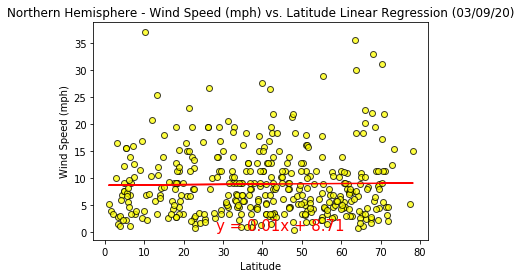

In [40]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({Date})")
linear_regression(Data_north["Latitude"],Data_north["Wind Speed"],"Yellow")

The r-squared is: -0.11777206679384172


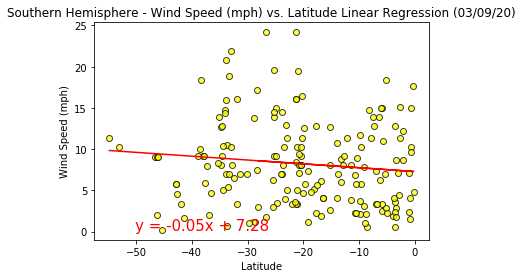

In [41]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression ({Date})")
linear_regression(Data_south["Latitude"],Data_south["Wind Speed"],"Yellow")